In [1]:
import os
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from yellowbrick.classifier import DiscriminationThreshold

### Import data

In [2]:
with open(r'config.yml') as file:
    val = yaml.load(file, Loader=yaml.FullLoader)

In [3]:
data = pd.read_csv("BankChurners_Trans.csv")

### Training Models

In [4]:
highly_correlated_variables = val["correlated_variables"]
x_data = data.drop(highly_correlated_variables, axis=1)
x_data = x_data.drop("Attrition_Flag", axis=1)
y_data = data["Attrition_Flag"]

#### Logistic Regression

In [5]:
non_significant_variables = val["non_significant_variables"]
x_data_lr = x_data.drop(non_significant_variables, axis=1)
model_logistic_regression = LogisticRegression(penalty="none")

skf = StratifiedKFold(n_splits=20, shuffle=True)
results_lr = []
for train_index, test_index in skf.split(x_data, y_data):
    X_train, X_test = x_data_lr.loc[train_index], x_data_lr.loc[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    model_logistic_regression.fit(X_train, y_train)
    predictions_lr = f1_score(y_test, model_logistic_regression.predict(X_test))
    results_lr.append(predictions_lr)

In [6]:
np.mean(results_lr)

0.5531191065617559

/Users/juanhernandez/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


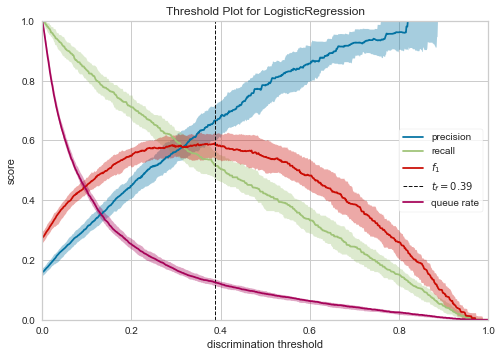

In [7]:
visualizer = DiscriminationThreshold(model_logistic_regression)
visualizer.fit(X_train, y_train)
visualizer.show();

In [8]:
non_significant_variables = val["non_significant_variables"]
x_data_lr = x_data.drop(non_significant_variables, axis=1)
model_logistic_regression = LogisticRegression(penalty="none")

skf = StratifiedKFold(n_splits=20, shuffle=True)
results_lr = []
for train_index, test_index in skf.split(x_data, y_data):
    X_train, X_test = x_data_lr.loc[train_index], x_data_lr.loc[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    model_logistic_regression.fit(X_train, y_train)
    y_scores = model_logistic_regression.predict_proba(X_test)[:, 1]
    y_pred_with_threshold = (y_scores >= 0.35).astype(int)
    predictions_lr = f1_score(y_test, y_pred_with_threshold)
    results_lr.append(predictions_lr)

In [9]:
np.mean(results_lr)

0.5897184285430411

#### KNN

In [10]:
model_knn = KNeighborsClassifier(3)
skf = StratifiedKFold(n_splits=20, shuffle=True)
results_knn = []
for train_index, test_index in skf.split(x_data, y_data):
    X_train, X_test = x_data_lr.loc[train_index], x_data_lr.loc[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    model_knn.fit(X_train, y_train)
    predictions_knn = f1_score(y_test, model_knn.predict(X_test))
    results_knn.append(predictions_knn)

In [11]:
np.mean(results_knn)

0.5585749979614432

/Users/juanhernandez/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


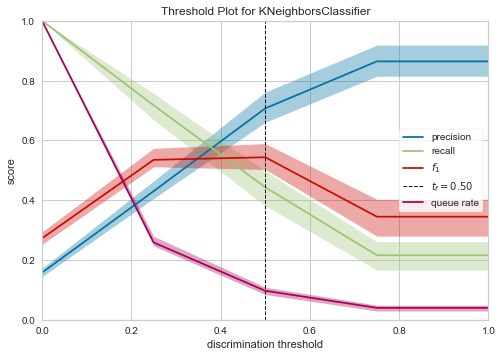

In [12]:
visualizer = DiscriminationThreshold(model_knn)
visualizer.fit(X_train, y_train)
visualizer.show();

#### Decision Tree

In [13]:
model_dt = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=20, shuffle=True)
results_dt = []
for train_index, test_index in skf.split(x_data, y_data):
    X_train, X_test = x_data_lr.loc[train_index], x_data_lr.loc[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    model_dt.fit(X_train, y_train)
    predictions_dt = f1_score(y_test, model_dt.predict(X_test))
    results_dt.append(predictions_dt)

In [14]:
np.mean(results_dt)

0.7291567009693748

#### Ensemble Logistic Regression, KNN and Decision Tree

In [15]:
model_ensemble = VotingClassifier(estimators=[
                                    ('lr', model_logistic_regression), 
                                    ('knn', model_knn), 
                                    ('dt', model_dt)], voting='soft')
skf = StratifiedKFold(n_splits=20, shuffle=True)
results_ensemble = []
for train_index, test_index in skf.split(x_data, y_data):
    X_train, X_test = x_data_lr.loc[train_index], x_data_lr.loc[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    model_ensemble.fit(X_train, y_train)
    predictions_ensemble = f1_score(y_test, model_ensemble.predict(X_test))
    results_ensemble.append(predictions_ensemble)                             

In [16]:
np.mean(results_ensemble)

0.6777670091085758

/Users/juanhernandez/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


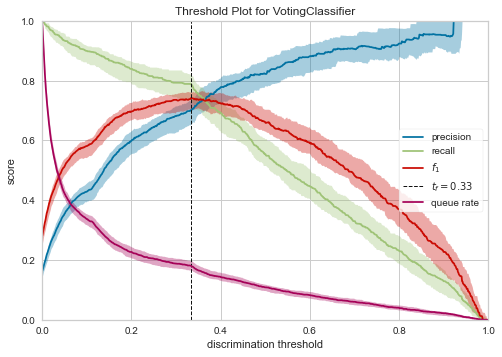

In [17]:
visualizer = DiscriminationThreshold(model_ensemble)
visualizer.fit(X_train, y_train)
visualizer.show();

#### Random Forrest

In [18]:
model_rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=20, shuffle=True)
results_rf = []
for train_index, test_index in skf.split(x_data, y_data):
    X_train, X_test = x_data_lr.loc[train_index], x_data_lr.loc[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    model_rf.fit(X_train, y_train)
    predictions_rf = f1_score(y_test, model_rf.predict(X_test))
    results_rf.append(predictions_rf)

In [19]:
np.mean(results_rf)

0.7901043879458214

/Users/juanhernandez/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


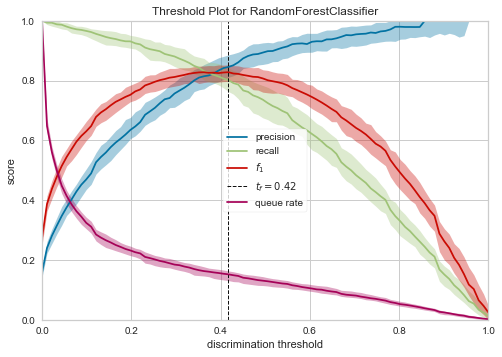

In [23]:
visualizer = DiscriminationThreshold(model_rf)
visualizer.fit(x_data_lr, y_data)
visualizer.show();

In [24]:
model_rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=20, shuffle=True)
results_rf = []
for train_index, test_index in skf.split(x_data, y_data):
    X_train, X_test = x_data_lr.loc[train_index], x_data_lr.loc[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    model_rf.fit(X_train, y_train)
    y_scores = model_rf.predict_proba(X_test)[:, 1]
    y_pred_with_threshold = (y_scores >= 0.42).astype(int)
    predictions_lr = f1_score(y_test, y_pred_with_threshold)
    results_rf.append(predictions_rf)

In [25]:
np.mean(results_rf)

0.786206896551724